In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import time

In [2]:
# generate synthetic data to perform regression
N = 1000
X = np.random.random((N,2)) * 10 - 5 # uniformly distributed between (-5,+5)
Y = np.cos(3*X[:,0]) + np.cos(2*X[:,1])
print(X.shape, Y.shape)

(1000, 2) (1000,)


Our target is y = $ \cos{3x_1} + \cos{2x_2} $. So 

$ y = \cos{3x} + \cos{2x} $

In [3]:
# plot the generated synthetic data
fig = px.scatter_3d(x = X[:,0], y = X[:,1], z = Y)
fig.show()

In [4]:
# reshape the target
Y = Y.reshape(-1,1)
print('Reshaped Y, new shape is:', Y.shape)

Reshaped Y, new shape is: (1000, 1)


In [5]:
def full_gd(model, criterion, optimizer, x_data, y_data, epochs = 500):
  """
  Applies full gradient descent to given data. X and Y should be in the shape of NxD1 and NxD2 where D1 is features and D2 is targets. 
  """

  # check if given data is a torch tensor
  if (type(x_data) != torch.Tensor):
    print("Creating torch.Tensor copy of features!")
    x_train = torch.from_numpy(x_data.astype(np.float32))
  if (type(y_data) != torch.Tensor):
    print("Creating torch.Tensor copy of targets!")
    y_train = torch.from_numpy(y_data.astype(np.float32))
  
  # now we can apply full gradient descent
  losses = np.zeros(epochs) # to plot the losses later

  for i in range(epochs):
    t0 = time.time()
    # forward propagation
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # backward propagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  
    # keep the loss in order to plot after training
    losses[i] = loss.item()

    t1 = time.time()
    if ((i+1)%50 == 0):
      print(f"Epoch {i+1}/{epochs}, took {t1-t0:.3f}s. Loss: {loss.item():.4f}")
  
  # plot the loss 
  fig = px.line(x = list(range(1,epochs+1)) ,y = losses, title = 'Loss per Epoch Graph', labels={'x': "Epochs", 'y': 'Losses'})
  fig.show()

In [6]:
# initialize the model, optimizer and loss function
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128,1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# train the model
full_gd(model, criterion, optimizer, X, Y, epochs = 1000)

Creating torch.Tensor copy of features!
Creating torch.Tensor copy of targets!
Epoch 50/1000, took 0.003s. Loss: 0.9757
Epoch 100/1000, took 0.003s. Loss: 0.8893
Epoch 150/1000, took 0.003s. Loss: 0.7470
Epoch 200/1000, took 0.003s. Loss: 0.6093
Epoch 250/1000, took 0.003s. Loss: 0.5004
Epoch 300/1000, took 0.003s. Loss: 0.4402
Epoch 350/1000, took 0.003s. Loss: 0.3859
Epoch 400/1000, took 0.006s. Loss: 0.3643
Epoch 450/1000, took 0.003s. Loss: 0.3289
Epoch 500/1000, took 0.003s. Loss: 0.3366
Epoch 550/1000, took 0.003s. Loss: 0.2758
Epoch 600/1000, took 0.004s. Loss: 0.2582
Epoch 650/1000, took 0.003s. Loss: 0.2424
Epoch 700/1000, took 0.003s. Loss: 0.2318
Epoch 750/1000, took 0.004s. Loss: 0.2453
Epoch 800/1000, took 0.004s. Loss: 0.2037
Epoch 850/1000, took 0.003s. Loss: 0.2135
Epoch 900/1000, took 0.003s. Loss: 0.1870
Epoch 950/1000, took 0.003s. Loss: 0.1889
Epoch 1000/1000, took 0.003s. Loss: 0.1734


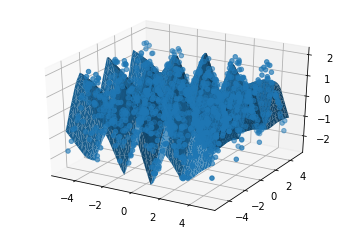

In [7]:
# make predictions and plot them
with torch.no_grad():
  preds = model(torch.from_numpy(X.astype(np.float32)))
  fig = px.scatter_3d(x = X[:, 0], y = X[:, 1], z = preds.numpy())
  fig.show()

  # also create a prediction surface and plot the surface with predictions
  fig = plt.figure()
  ax = fig.add_subplot(111, projection = '3d')
  ax.scatter(X[:,0], X[:,1], Y)

  line = np.linspace(-5,5,50)
  xx, yy = np.meshgrid(line,line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth = .2, antialiased = True)
  plt.show()